# Proyecto 10 - Luis G

## Priorizar hipótesis

In [686]:
# Importar librerias

import pandas as pd
import scipy
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats as st

In [687]:
# Importar datasets

df_hyp = pd.read_csv('hypotheses_us.csv', sep=';')

In [688]:
# Preprocesamiento de datos

df_hyp.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Effort      9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 492.0+ bytes


In [689]:
df_hyp.head(10)

,Hypothesis,Reach,Impact,Confidence,Effort
0,Add two new channels for attracting traffic. T...,3,10,8,6
1,Launch your own delivery service. This will sh...,2,5,4,10
2,Add product recommendation blocks to the store...,8,3,7,3
3,Change the category structure. This will incre...,8,3,3,8
4,Change the background color on the main page. ...,3,1,1,1
5,Add a customer review page. This will increase...,3,2,2,3
6,Show banners with current offers and sales on ...,5,3,8,3
7,Add a subscription form to all the main pages....,10,7,8,5
8,Launch a promotion that gives users discounts ...,1,9,9,5


In [690]:
# Nombres de columna snakecase

df_hyp.columns = [x.lower() for x in df_hyp.columns]

In [691]:
# Framework ICE

df_hyp['ICE'] = (df_hyp['impact'] * df_hyp['confidence']) / df_hyp['effort']
df_hyp_ice = df_hyp.sort_values(by='ICE', ascending=False)

# Framework RICE

df_hyp['RICE'] = (df_hyp['reach'] * df_hyp['impact'] * df_hyp['confidence']) / df_hyp['effort']
df_hyp_rice = df_hyp.sort_values(by='RICE', ascending=False)

df_hyp_ice

,hypothesis,reach,impact,confidence,effort,ICE
8,Launch a promotion that gives users discounts ...,1,9,9,5,16.200000
0,Add two new channels for attracting traffic. T...,3,10,8,6,13.333333
7,Add a subscription form to all the main pages....,10,7,8,5,11.200000
6,Show banners with current offers and sales on ...,5,3,8,3,8.000000
2,Add product recommendation blocks to the store...,8,3,7,3,7.000000
1,Launch your own delivery service. This will sh...,2,5,4,10,2.000000
5,Add a customer review page. This will increase...,3,2,2,3,1.333333
3,Change the category structure. This will incre...,8,3,3,8,1.125000
4,Change the background color on the main page. ...,3,1,1,1,1.000000


In [692]:
df_hyp_rice

,hypothesis,reach,impact,confidence,effort,ICE,RICE
7,Add a subscription form to all the main pages....,10,7,8,5,11.200000,112.0
2,Add product recommendation blocks to the store...,8,3,7,3,7.000000,56.0
0,Add two new channels for attracting traffic. T...,3,10,8,6,13.333333,40.0
6,Show banners with current offers and sales on ...,5,3,8,3,8.000000,40.0
8,Launch a promotion that gives users discounts ...,1,9,9,5,16.200000,16.2
3,Change the category structure. This will incre...,8,3,3,8,1.125000,9.0
1,Launch your own delivery service. This will sh...,2,5,4,10,2.000000,4.0
5,Add a customer review page. This will increase...,3,2,2,3,1.333333,4.0
4,Change the background color on the main page. ...,3,1,1,1,1.000000,3.0


- Podemos observar que las hipótesis 7 y 0 están dentro del top 3 en ambos frameworks.
- Igual podemos ver cómo en el framework RICE se adelanta la hipótesis 7 a causa de tener un alcance de todos los usuarios (ya que es un cambio que se verá en todas las páginas principales)
- Una mención honorífica en este ranking sería la hipótesis 2, ya que tendría bastante alcance, mientras afectaría poco a los usuarios y es poco esfuerzo para la empresa realizar esta propuesta.
- Como recomendación general, consideraría primero el presupuesto destinado a este proyecto, y en caso de ser alto, me iría por la hipótesis 7 (primer lugar) o 0 (segundo lugar).
- Además de que parecen ser las más prometedoras, no requieren el esfuerzo máximo de la empresa, y con ello, los altos cargos estarán satisfechos si ven resultados sin sacrificar poder operativo.
- Como tercera opción, me quedaría con la hipótesis 2; que incluso requiere aún menos esfuerzo que las anteriores hipótesis propuestas y tiene potencial de alcanzar a muchos clientes, esperando que sea para bien.

## Análisis del test A/B

In [693]:
# Importar datasets

orders = pd.read_csv('orders_us.csv')
visits = pd.read_csv('visits_us.csv')

### Análisis inicial

In [694]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   transactionId  1197 non-null   int64  
 1   visitorId      1197 non-null   int64  
 2   date           1197 non-null   object 
 3   revenue        1197 non-null   float64
 4   group          1197 non-null   object 
dtypes: float64(1), int64(2), object(2)
memory usage: 46.9+ KB


In [695]:
orders.sample(10)

,transactionId,visitorId,date,revenue,group
347,4143214054,1869662856,2019-08-03,70.2,A
498,2596511168,2370420350,2019-08-04,40.3,B
1150,1722995581,2761566146,2019-08-14,25.4,A
443,2466620500,1388838483,2019-08-03,115.3,B
1037,4149581711,1555048873,2019-08-31,30.2,B
235,395889669,2873491771,2019-08-23,10.2,B
380,1177690313,2458001652,2019-08-25,40.7,B
204,1935539409,3836897869,2019-08-17,105.1,B
327,3909269888,1668030113,2019-08-28,80.0,B
764,2176732109,705680638,2019-08-07,20.7,A


In [696]:
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    62 non-null     object
 1   group   62 non-null     object
 2   visits  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


In [697]:
visits.sample(10)

,date,group,visits
45,2019-08-15,B,544
0,2019-08-01,A,719
6,2019-08-07,A,644
19,2019-08-20,A,575
18,2019-08-19,A,502
48,2019-08-18,B,737
35,2019-08-05,B,707
4,2019-08-05,A,756
39,2019-08-09,B,610
2,2019-08-03,A,507


In [698]:
# Cambiar columnas a datetime

orders['date'] = pd.to_datetime(orders['date'], format="%Y-%m-%d")
visits['date'] = pd.to_datetime(visits['date'], format="%Y-%m-%d")

# Después de unos describes, observamos que los datos son únicamente del mes de agosto; por ello, estaremos extrayendo la columna de días únicamente

orders['day'] = orders['date'].dt.day
visits['day'] = visits['date'].dt.day

### Análisis inicial

In [699]:
# Número de casos por grupo

orders['group'].value_counts()

group
B    640
A    557
Name: count, dtype: int64

- El conteo de casos por grupo parece bastante balanceado, esto no afectará más adelante a la prueba A/B

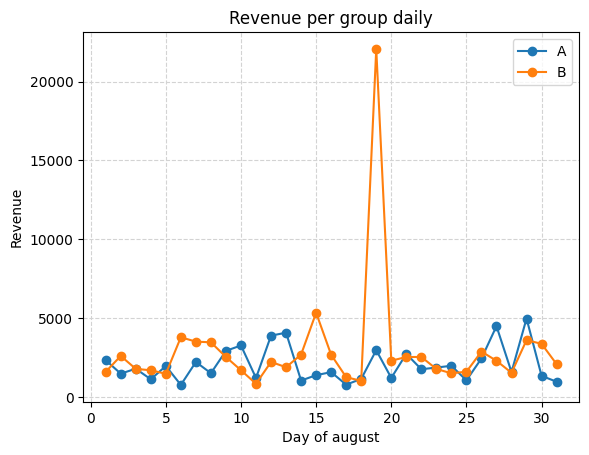

In [700]:
# Ingreso por día de cada grupo

revenue_per_groupdaily = orders.groupby(['group','day'])['revenue'].sum().reset_index()

for group in revenue_per_groupdaily['group'].unique():
    data = revenue_per_groupdaily[revenue_per_groupdaily['group'] == group]
    plt.plot(data['day'], data['revenue'], marker='o',label=group)

plt.legend()
plt.title('Revenue per group daily')
plt.xlabel('Day of august')
plt.ylabel('Revenue')
plt.grid(linestyle='--', color='lightgray')
plt.xticks()
plt.show()

- Observamos un pico en las ventas del grupo B, habrá que tener esto en cuenta más adelante para nuestro análisis.

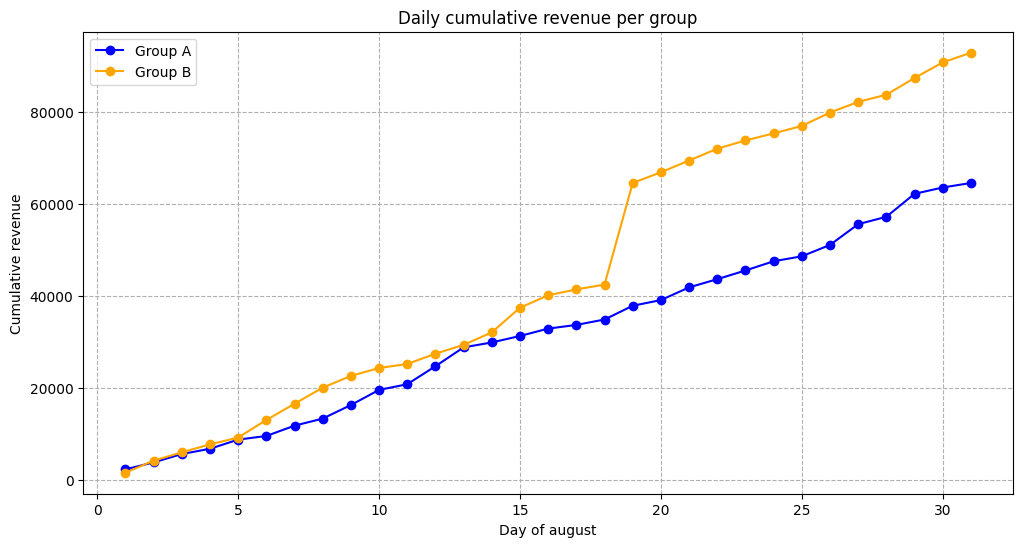

In [701]:
# Ingreso acumulado por grupo y por día

daily_revenue_A = orders.query("group == 'A'").sort_values('day')
daily_revenue_B = orders.query("group == 'B'")

daily_revenue_A = daily_revenue_A.groupby('day')['revenue'].sum().reset_index()
daily_revenue_B = daily_revenue_B.groupby('day')['revenue'].sum().reset_index()

daily_revenue_A['cum_revenue'] = daily_revenue_A['revenue'].cumsum()
daily_revenue_B['cum_revenue'] = daily_revenue_B['revenue'].cumsum()

# Graficar juntas ambas variables

plt.figure(figsize=(12, 6))
plt.plot(daily_revenue_A['day'], daily_revenue_A['cum_revenue'], label='Group A', color='blue', marker='o')
plt.plot(daily_revenue_B['day'], daily_revenue_B['cum_revenue'], label='Group B', color='orange', marker='o')

plt.title('Daily cumulative revenue per group')
plt.xlabel('Day of august')
plt.ylabel('Cumulative revenue')
plt.legend()
plt.grid(True, linestyle='--')
plt.show()

- En términos generales, parece ser que el grupo B está mucho mejor en ventas que el grupo A; coincidiendo también con la gráfica de ventas diarias por grupo, gracias al pico que presenta alrededor del 17 de agosto.

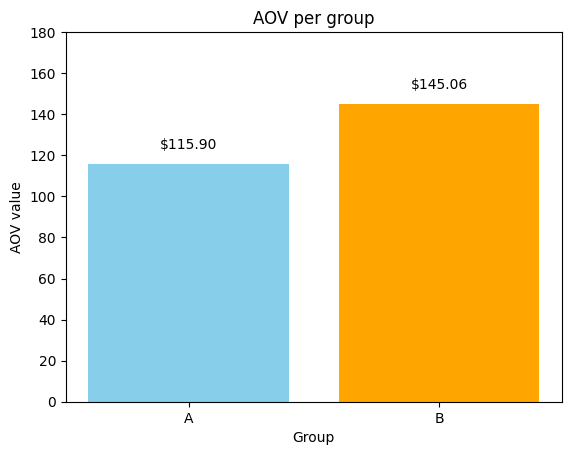

In [702]:
# Tamaño promedio de pedido por grupo (AOV)

aov_A = orders.query("group == 'A'")['revenue'].sum() / orders.query("group == 'A'")['transactionId'].nunique()
aov_B = orders.query("group == 'B'")['revenue'].sum() / orders.query("group == 'B'")['transactionId'].nunique()

# Datos para la gráfica
groups = ['A', 'B']
aovs = [aov_A, aov_B]

# Crear la gráfica de barras
plt.bar(groups, aovs, color=['skyblue', 'orange'])

# Personalización
plt.xlabel('Group')
plt.ylabel('AOV value')
plt.title('AOV per group')
plt.ylim(0,180)

for i, value in enumerate(aovs):
    plt.text(i, value + (max(aovs) * 0.05), f"${value:.2f}", ha='center', fontsize=10)

- Observamos que el grupo experimental sí tiene una diferencia considerable en el tamaño de sus pedidos; esto puede significar varias cosas y no necesariamente que el experimento fue un éxito. Podría ser que esos clientes hicieron pedidos mayores porque se juntaron otros factores.
- Probablemente el pedido grande de la gráfica anterior está haciendo que el valor de acá crezca.

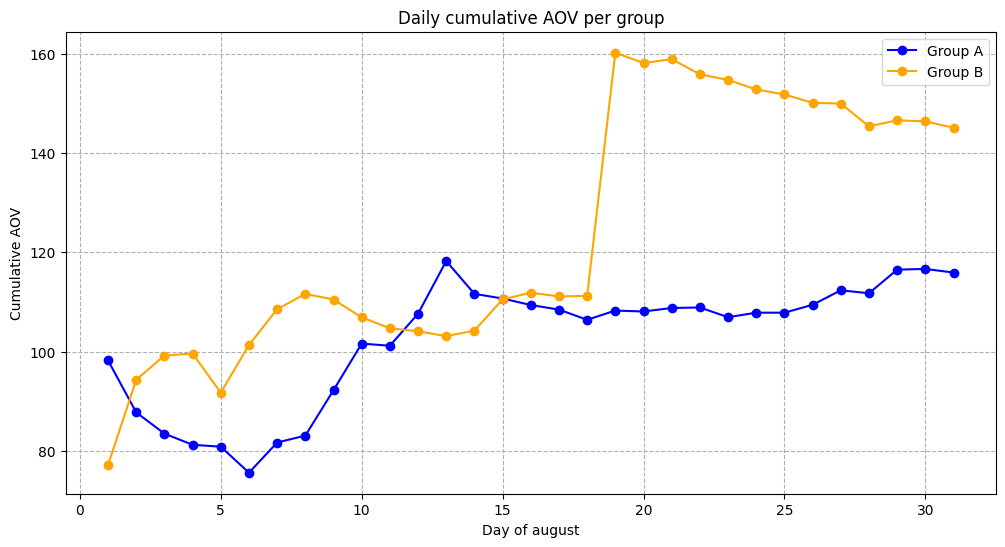

In [703]:
# Tamaño promedio de pedido acumulado por grupo diariamente (cumulative AOV)

daily_cum_aov_A = orders.query("group == 'A'")
daily_cum_aov_B = orders.query("group == 'B'")

daily_cum_aov_A = daily_cum_aov_A.groupby('day').agg({'revenue':'sum', 'transactionId':'nunique'}).reset_index()
daily_cum_aov_B = daily_cum_aov_B.groupby('day').agg({'revenue':'sum', 'transactionId':'nunique'}).reset_index()

daily_cum_aov_A['revenue_cum'] = daily_cum_aov_A['revenue'].cumsum()
daily_cum_aov_A['transactions_cum'] = daily_cum_aov_A['transactionId'].cumsum()
daily_cum_aov_B['revenue_cum'] = daily_cum_aov_B['revenue'].cumsum()
daily_cum_aov_B['transactions_cum'] = daily_cum_aov_B['transactionId'].cumsum()

# Finalmente AOV acumulado correctamente
daily_cum_aov_A['cum_aov'] = daily_cum_aov_A['revenue_cum'] / daily_cum_aov_A['transactions_cum']
daily_cum_aov_B['cum_aov'] = daily_cum_aov_B['revenue_cum'] / daily_cum_aov_B['transactions_cum']

# Graficar ambas variables

plt.figure(figsize=(12, 6))
plt.plot(daily_cum_aov_A['day'], daily_cum_aov_A['cum_aov'], label='Group A', color='blue', marker='o')
plt.plot(daily_cum_aov_B['day'], daily_cum_aov_B['cum_aov'], label='Group B', color='orange', marker='o')

plt.title('Daily cumulative AOV per group')
plt.xlabel('Day of august')
plt.ylabel('Cumulative AOV')
plt.legend()
plt.grid(True, linestyle='--')
plt.show()



- Con esta gráfica da la impresión de que al inicio estaban bastante relativamente parejos ambos grupos, esto hablando de la primera mitad del mes.
- Después llegó el pedido fuerte del 17 de agosto (aprox) y de ahí se impulsaron las ordenes en general, dejando al grupo B por la delantera y por mucho.

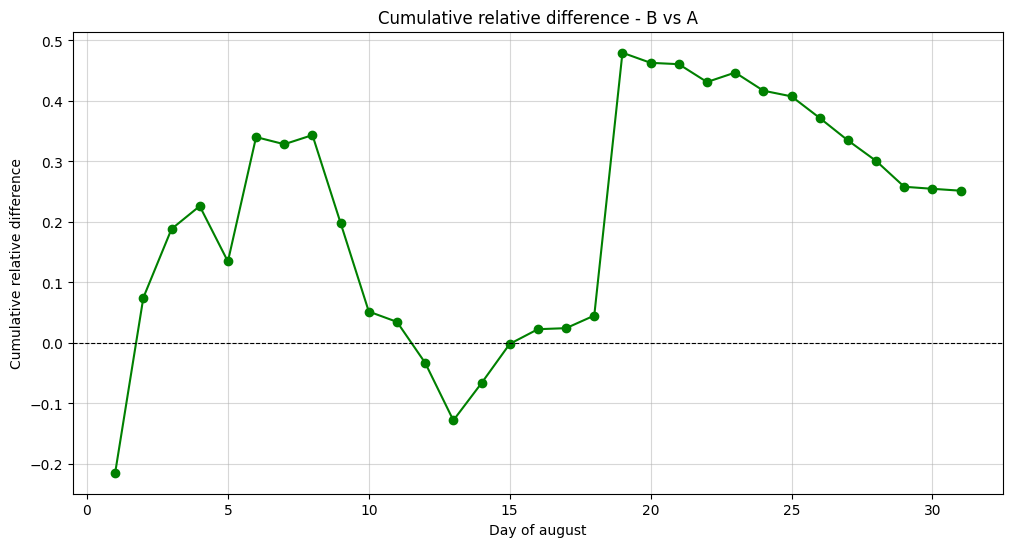

In [704]:
# Diferencia relativa acumulada en el AOV

daily_cum_aov_general = pd.merge(
    daily_cum_aov_A[['day', 'cum_aov']],
    daily_cum_aov_B[['day', 'cum_aov']],
    on='day',
    suffixes=('_A', '_B')
)

daily_cum_aov_general['relative_diff'] = (daily_cum_aov_general['cum_aov_B'] / daily_cum_aov_general['cum_aov_A']) - 1

# Graficar

plt.figure(figsize=(12, 6))
plt.plot(daily_cum_aov_general['day'], daily_cum_aov_general['relative_diff'], marker='o', linestyle='-', color='green')

plt.axhline(0, color='black', linewidth=0.8, linestyle='--')
plt.title('Cumulative relative difference - B vs A')
plt.xlabel('Day of august')
plt.ylabel('Cumulative relative difference')
plt.grid(True, alpha=0.5)
plt.show()


- Gracias a este gráfico, observamos que en general el grupo B tuvo mejor rendimiento en cuanto a AOV durante todo el mes, solamente hubo un pequeño momento en el que el grupo A tuvo mejores tamaños de pedido, antes del día 15.

- Con todos estos gráficos, nos acercamos más y más a creer que el grupo B sí tuvo mejor rendimiento en general.

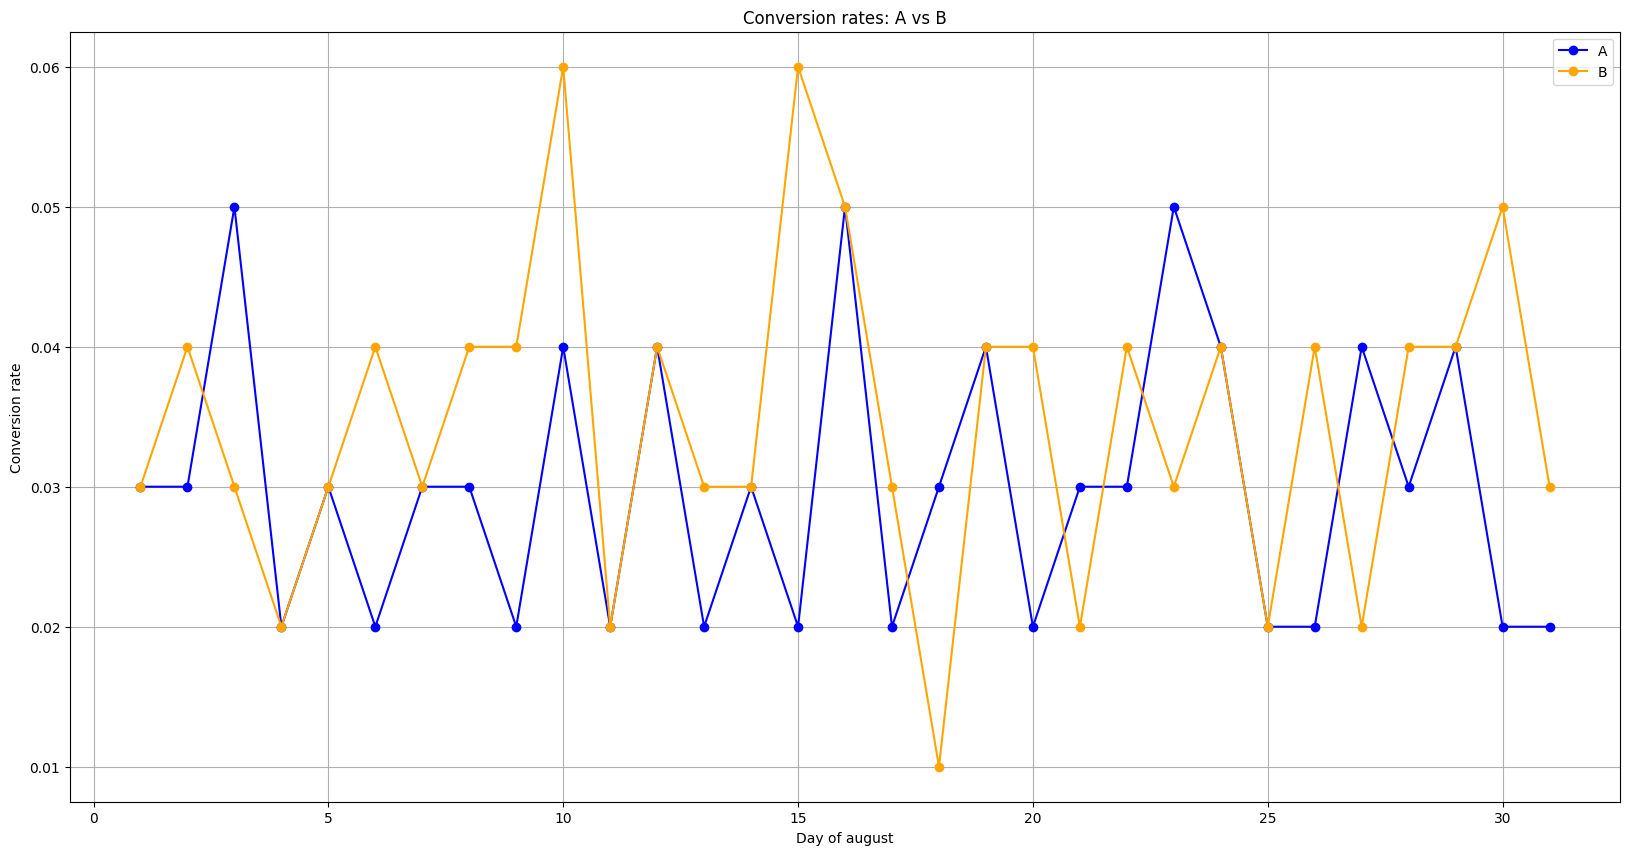

In [705]:
# Tasa de conversión

conv_rate = orders.groupby(['group','day']).agg(n_orders = ('visitorId','nunique')).reset_index()

conv_rate = conv_rate.merge(visits, on = ['day','group'])

conv_rate['conversion'] = (conv_rate['n_orders'] / conv_rate['visits']).round(2)

conv_rate_A = conv_rate.query("group == 'A'")
conv_rate_B = conv_rate.query("group == 'B'")


plt.figure(figsize=(20,10))
plt.plot(conv_rate_A['day'], conv_rate_A['conversion'], marker='o', color='blue', label='A')
plt.plot(conv_rate_B['day'], conv_rate_B['conversion'], marker= 'o', color='orange',label='B')
plt.title('Conversion rates: A vs B')
plt.xlabel('Day of august')
plt.ylabel('Conversion rate')
plt.grid()

plt.legend()
plt.show()

- Curiosamente cerca del día que tenemos en cuenta que hubo un aumento fuerte para el grupo B, la tasa de conversión fue menor, dando a entender que, probablemente fueron muchas visitas pero que realmente solamente compraron unas cuantas personas unos pedidos grandes.
- Aún así, me parece que ambas tasas de conversión se comportan similar, aunque aún me inclino un poco más por el desempeño del grupo B, me parece superior.

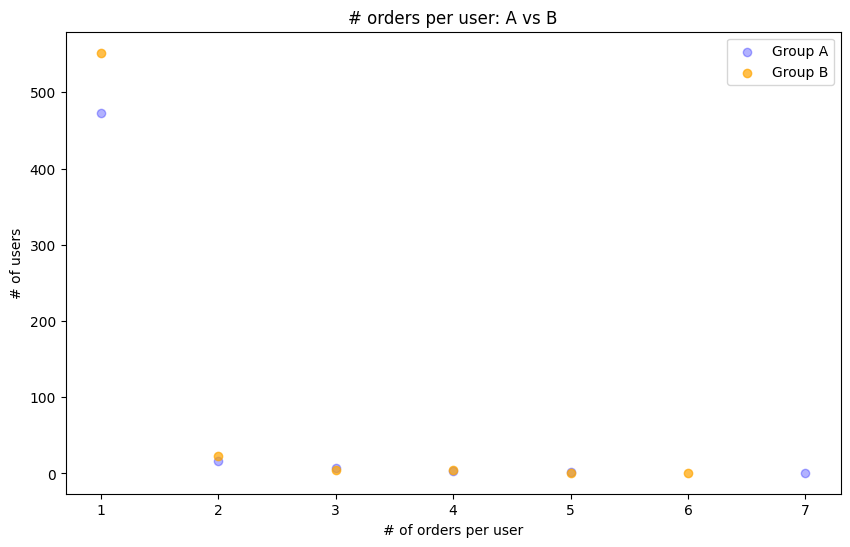

In [706]:
# Número de pedidos por usuario

n_orders_per_user = orders.groupby(['group','visitorId']).agg(n_orders = ('transactionId','count')).reset_index()

n_orders_user_count_A = n_orders_per_user.query("group == 'A'").groupby('n_orders').size().reset_index(name='n_users')
n_orders_user_count_B = n_orders_per_user.query("group == 'B'").groupby('n_orders').size().reset_index(name='n_users')

plt.figure(figsize=(10, 6))
plt.scatter(n_orders_user_count_A['n_orders'], n_orders_user_count_A['n_users'], alpha=0.3, label='Group A', color='blue')
plt.scatter(n_orders_user_count_B['n_orders'], n_orders_user_count_B['n_users'], alpha=0.7, label='Group B', color='orange')

plt.title("# orders per user: A vs B")
plt.legend()
plt.ylabel("# of users")
plt.xlabel("# of orders per user")
plt.show()

- Con el gráfico observamos que la mayoría de usuarios hicieron un pedido a lo largo del mes.
- Ya que se trata de una tienda online, nos interesaría que a lo largo del mes un usuario haga más pedidos.
- Aparte de eso, los grupos se comportan bastante similar en cuanto a esta métrica, con la particularidad que en el grupo A tenemos unos cuantos clientes que hicieron 7 pedidos en el mes.
- Una vez más, el grupo B muestra superioridad en la métrica del pedido único, con una diferencia fuerte.

In [707]:
# Percentiles para valores atípicos

n_orders_per_user.describe() # Hasta el 75% de los datos, sigue siendo 1 orden el número más visto

np.percentile(n_orders_per_user['n_orders'], [94, 95, 99]) # Regresa 1, 2 y 4

array([1., 2., 4.])

- Considero que podemos quedarnos con el 94% de datos para el análisis, los últimos valores no aportan mucho para esto.

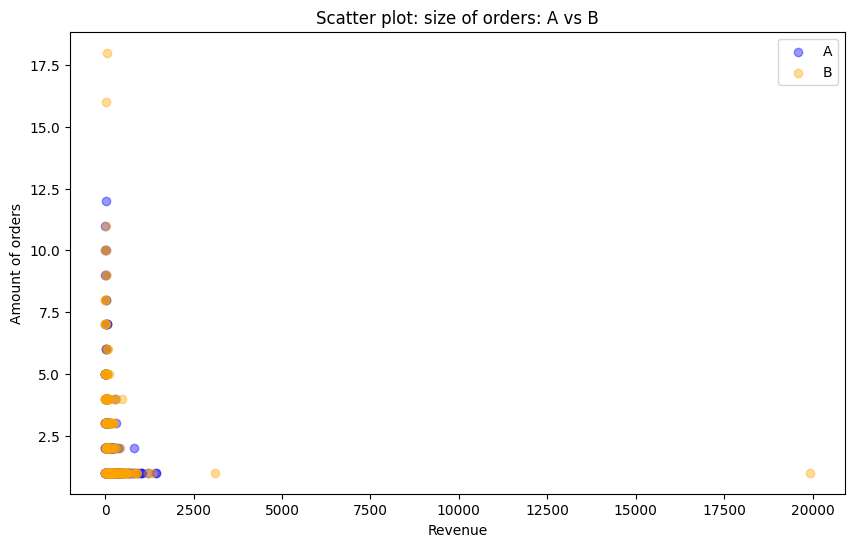

In [708]:
# Dispersión de los precios de los pedidos
# x = Precios y = Cantidad de pedidos con ese precio

n_orders_per_rev = orders.groupby(['group','revenue']).agg(n_orders =('transactionId', 'count')).reset_index()

n_orders_per_rev_A = n_orders_per_rev.query("group == 'A'")
n_orders_per_rev_B = n_orders_per_rev.query("group == 'B'")

plt.figure(figsize=(10,6))
plt.scatter(n_orders_per_rev_A['revenue'], n_orders_per_rev_A['n_orders'], alpha = 0.4, color='blue', label='A')
plt.scatter(n_orders_per_rev_B['revenue'], n_orders_per_rev_B['n_orders'], alpha = 0.4, color='orange', label='B')

plt.title('Scatter plot: size of orders: A vs B')
plt.xlabel('Revenue')
plt.ylabel('Amount of orders')
plt.legend()
plt.show()

- Encontramos un pedido anormal en el grupo B, que justo era lo que habíamos estado visualizando a lo largo del análisis.
- Si queremos respuestas confiables, habrá que pensar en quitar ese valor y tener ambos grupos sin sesgos.

In [709]:
# Percentiles del tamaño de los pedidos

n_orders_per_rev.describe() # Hasta el 75% de los datos, tenemos órdenes que no pasan de centenares, tenemos un valor de 19,920 como máximo

np.percentile(n_orders_per_rev['revenue'],[95,97,99])

array([ 613.46,  815.8 , 1220.2 ])

- Conservaremos el 95% de los datos, retirando el valor atípico de 19,920 y cualquier otro que esté por encima de 613.46, es un buen rango para realizar el análisis.

### Significancia estadística en la conversión entre ambos grupos (raw data)

- Ho = La conversión entre ambos grupos es igual
- Ha = La conversión entre ambos grupos tiene diferencias

In [710]:
alpha = 0.05

results1 = st.mannwhitneyu(conv_rate_A['conversion'], conv_rate_B['conversion'])

print("Valor MannWhitney: ", results1[0])
print("p value: ", results1[1])
print("\n")

if results1.pvalue < alpha:
    print(f"Rechazamos hipótesis nula: Hay una diferencia significativa entre ambas distribuciones.")
else:
    print(f"No podemos rechazar la hipótesis nula, las distribuciones se consideran iguales")

Valor MannWhitney:  357.0
p value:  0.0719068584728121


No podemos rechazar la hipótesis nula, las distribuciones se consideran iguales


### Significancia estadística en el tamaño promedio de pedido entre ambos grupos (raw data)

- Ho: Los tamaños promedio de las órdenes no varían, son iguales.
- Ha: Los tamaños promedio de las ordenes presentan variaciones.

In [711]:
# Primero calculamos el aov por usuario, para tener una distribución

aov_per_user = orders.groupby(['group','visitorId']).agg(revenue = ('revenue', 'sum'), n_orders = ('transactionId','nunique')).reset_index()

aov_per_user['aov_user'] = aov_per_user['revenue'] / aov_per_user['n_orders']

aov_per_user_A = aov_per_user.query("group == 'A'").reset_index(drop=True)
aov_per_user_B = aov_per_user.query("group == 'B'").reset_index(drop=True)

In [712]:
# Luego verificamos las varianzas de ambas distribuciones con el método de Levene

# Ho = Las varianzas son iguales
# Ha = Las varianzas presentan diferencias

results_lev = st.levene(aov_per_user_A['aov_user'], aov_per_user_B['aov_user'])

print("Valor Levene: ", results_lev[0])
print("p value: ", results_lev[1])
print("\n")

if results_lev.pvalue < alpha:
    print(f"Rechazamos hipótesis nula: Hay una diferencia significativa entre las varianzas de ambas distribuciones.")
else:
    print(f"No podemos rechazar la hipótesis nula, las varianzas de ambas distribuciones se consideran iguales")

Valor Levene:  0.6246944860936445
p value:  0.42948051031375245


No podemos rechazar la hipótesis nula, las varianzas de ambas distribuciones se consideran iguales


- Ya que las varianzas se consideran iguales, continuamos con la prueba t para los promedios en los tamaños de orden.

- Ho = El tamaño de orden promedio es menor o igual entre el grupo A y B
- Ha = El tamaño de orden promedio es mayor en el grupo B

In [713]:
results2 = st.ttest_ind(aov_per_user_A['aov_user'], aov_per_user_B['aov_user'], alternative='greater', equal_var=True)

print("Valor T: ", results2[0])
print("p value: ", results2[1])
print("\n")

if results2.pvalue < alpha:
    print(f"Rechazamos hipótesis nula: El grupo B presenta un tamaño promedio de orden mayor.")
else:
    print(f"No podemos rechazar la hipótesis nula, el tamaño promedio de orden entre ambos grupos se consideran iguales.")

Valor T:  -0.7824226217367012
p value:  0.7829316742671122


No podemos rechazar la hipótesis nula, el tamaño promedio de orden entre ambos grupos se consideran iguales.


### Significancia estadística en la conversión entre ambos grupos (filtered data)



In [714]:
# Eliminaremos las órdenes con un revenue mayor a 613.46

filtered_orders = orders.query("revenue <= 613.46").reset_index(drop=True)

In [715]:
# Armar las distribuciones con el valor filtrado

f_conv_rate = filtered_orders.groupby(['group','day']).agg(n_orders = ('visitorId','nunique')).reset_index()

f_conv_rate = f_conv_rate.merge(visits, on = ['day','group'])

f_conv_rate['conversion'] = (f_conv_rate['n_orders'] / f_conv_rate['visits']).round(2)

f_conv_rate_A = f_conv_rate.query("group == 'A'")
f_conv_rate_B = f_conv_rate.query("group == 'B'")

In [716]:
# Prueba MannWhitney con valores filtrados

results3 = st.mannwhitneyu(f_conv_rate_A['conversion'], f_conv_rate_B['conversion'])

print("Valor MannWhitney: ", results3[0])
print("p value: ", results3[1])
print("\n")

if results3.pvalue < alpha:
    print(f"Rechazamos hipótesis nula: Hay una diferencia significativa entre ambas distribuciones.")
else:
    print(f"No podemos rechazar la hipótesis nula, las distribuciones se consideran iguales")


Valor MannWhitney:  332.5
p value:  0.030503640369595648


Rechazamos hipótesis nula: Hay una diferencia significativa entre ambas distribuciones.


### Significancia estadística en el tamaño promedio de pedido entre ambos grupos (filtered data)

In [717]:
# Primero calculamos el aov por usuario, para tener una distribución

f_aov_per_user = filtered_orders.groupby(['group','visitorId']).agg(revenue = ('revenue', 'sum'), n_orders = ('transactionId','nunique')).reset_index()

f_aov_per_user['aov_user'] = f_aov_per_user['revenue'] / f_aov_per_user['n_orders']

f_aov_per_user_A = f_aov_per_user.query("group == 'A'").reset_index(drop=True)
f_aov_per_user_B = f_aov_per_user.query("group == 'B'").reset_index(drop=True)

In [718]:
# Luego verificamos las varianzas de ambas distribuciones con el método de Levene

# Ho = Las varianzas son iguales
# Ha = Las varianzas presentan diferencias

f_results_lev = st.levene(f_aov_per_user_A['aov_user'], f_aov_per_user_B['aov_user'])

print("Valor Levene: ", f_results_lev[0])
print("p value: ", f_results_lev[1])
print("\n")

if f_results_lev.pvalue < alpha:
    print(f"Rechazamos hipótesis nula: Hay una diferencia significativa entre las varianzas de ambas distribuciones.")
else:
    print(f"No podemos rechazar la hipótesis nula, las varianzas de ambas distribuciones se consideran iguales")

Valor Levene:  1.1883105853730627
p value:  0.27591810627063784


No podemos rechazar la hipótesis nula, las varianzas de ambas distribuciones se consideran iguales


- Las varianzas se consideran iguales, así que continuaremos con la prueba T

- Ho = El tamaño de orden promedio es menor o igual entre el grupo A y B
- Ha = El tamaño de orden promedio es mayor en el grupo B

In [719]:
results4 = st.ttest_ind(f_aov_per_user_A['aov_user'], f_aov_per_user_B['aov_user'], alternative='greater', equal_var=True)

print("Valor T: ", results4[0])
print("p value: ", results4[1])
print("\n")

if results4.pvalue < alpha:
    print(f"Rechazamos hipótesis nula: El grupo B presenta un tamaño promedio de orden mayor.")
else:
    print(f"No podemos rechazar la hipótesis nula, el tamaño promedio de orden entre ambos grupos se consideran iguales.")

Valor T:  -1.0039616145886245
p value:  0.8421869886831549


No podemos rechazar la hipótesis nula, el tamaño promedio de orden entre ambos grupos se consideran iguales.


## Conclusiones generales

- Con las pruebas de hipótesis podemos ver que efectivamente la conversión en el grupo B fue mayor, con esto, yo daría por concluida la prueba y asignaría al grupo B como ganador.
- Es decir, si el planteamiento inicial era la conversión de usuarios, entonces sí deberían implementar el cambio propuesto para el grupo B.
- Por otro lado, si su planteamiento inicial fue respecto al AOV, encontramos que no existe diferencia significativa como para implementar los cambios.

- Yo daría por concluida la prueba y pondría al grupo B como superior en términos de conversión.